# CartPole Explorer Playground

Test the CartPole environment with the Explorer framework.


In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from explorer import Explorer
from env_adaptors.cartPole_adaptor import CartPoleAdaptor

In [ ]:
# Note: Update config.py before running:
# explorer_settings["env_name"] = "cartpole_llama"
# explorer_settings["backend_env"] = "cartpole-vanilla"

e = Explorer()


In [ ]:
print("Starting exploration...")
e.explore()
print("Exploration completed!")


In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
# 安装必要的依赖
!pip install pygame matplotlib -q
# 或者安装完整的classic-control环境
# !pip install "gymnasium[classic-control]" -q


In [7]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython import display

# 创建环境，使用 rgb_array 模式
env = gym.make("CartPole-v1", render_mode="rgb_array")

# 重置环境
obs, info = env.reset()

# 显示当前帧
plt.figure(figsize=(8, 6))
img = plt.imshow(env.render())
plt.axis('off')
plt.show()

# 如果要显示动画（逐帧更新）
for i in range(100):
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    
    # 更新显示
    img.set_data(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
    if terminated or truncated:
        obs, info = env.reset()

env.close()

<Figure size 640x480 with 0 Axes>

In [4]:
# 检查pygame是否已安装
try:
    import pygame
    print(f"✓ pygame已安装，版本: {pygame.__version__}")
except ImportError:
    print("✗ pygame未安装，请先运行上面的Cell 1")

# 测试matplotlib
import matplotlib
print(f"✓ matplotlib已安装，版本: {matplotlib.__version__}")


✓ pygame已安装，版本: 2.6.1
✓ matplotlib已安装，版本: 3.10.7


In [6]:
from IPython.display import display
fig = plt.figure()
plt.imshow(frame)
display(fig)

NameError: name 'frame' is not defined

<Figure size 640x480 with 0 Axes>

创建环境...
重置环境...
渲染图像...
图像尺寸: (400, 600, 3)
显示图像...


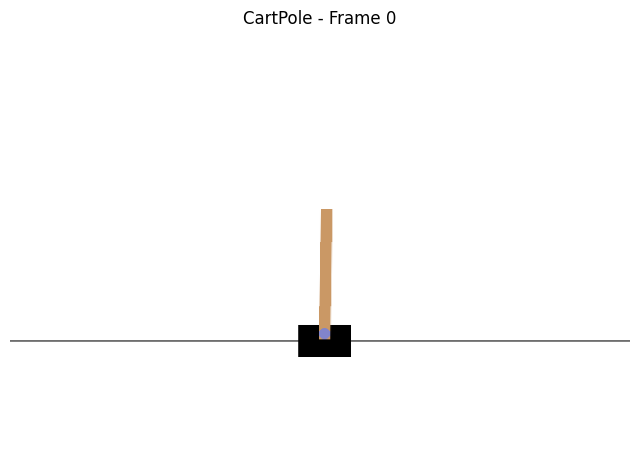

完成！


In [8]:
# 简单测试：显示一帧静态图像
import gymnasium as gym
import matplotlib.pyplot as plt

print("创建环境...")
env = gym.make("CartPole-v1", render_mode="rgb_array")

print("重置环境...")
obs, info = env.reset()

print("渲染图像...")
frame = env.render()
print(f"图像尺寸: {frame.shape}")

print("显示图像...")
plt.figure(figsize=(8, 6))
plt.imshow(frame)
plt.axis('off')
plt.title('CartPole - Frame 0')
plt.show()

env.close()
print("完成！")


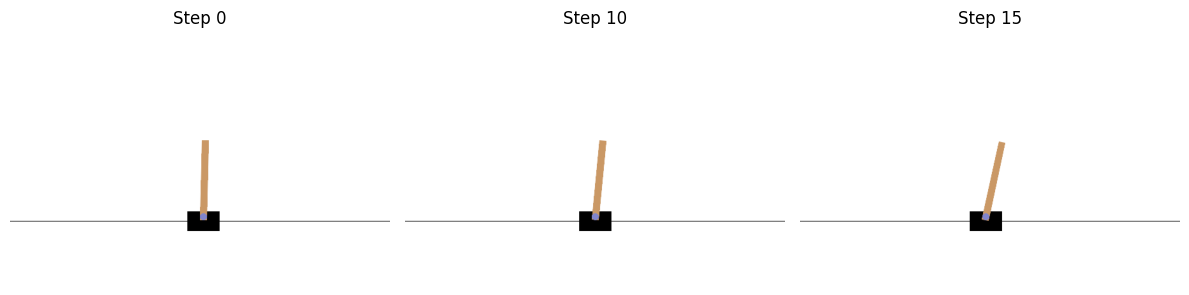

显示了 3 帧


In [9]:
# 方案：显示多个关键帧
import gymnasium as gym
import matplotlib.pyplot as plt

env = gym.make("CartPole-v1", render_mode="rgb_array")
obs, info = env.reset()

frames = []
steps = []

# 收集一些帧
for i in range(50):
    if i % 10 == 0:  # 每10步保存一帧
        frames.append(env.render())
        steps.append(i)
    
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    
    if terminated or truncated:
        frames.append(env.render())
        steps.append(i)
        break

env.close()

# 显示收集的帧
n_frames = len(frames)
fig, axes = plt.subplots(1, n_frames, figsize=(4*n_frames, 4))

if n_frames == 1:
    axes = [axes]

for ax, frame, step in zip(axes, frames, steps):
    ax.imshow(frame)
    ax.set_title(f'Step {step}')
    ax.axis('off')

plt.tight_layout()
plt.show()

print(f"显示了 {n_frames} 帧")
